In [1]:
# Steps that need to be done for project
# 1. Pull the latest trends from google trends
# 2. Connect with NEWSAPI with API licence and provide inputs into API call
# 3. Create a front end with a container, top =, bottom = navigation pannel, middle= main options
# 4. Create the middle container that has the shows the top trends in a histagram that allow the user to click
#  on the trend and will allow the url to open up
# 5. Create the container that a search functionality with the ability to search keywords, sites and themes for 
#  newsapi
# 6. Display the different news outcomes based on the search results or user clicking on the top trends



In [2]:

import requests
from bs4 import BeautifulSoup
import re

rss_title = []

# URL of the webpage
url = "https://trends.google.com/trends/trendingsearches/daily/rss?geo=AU"

# Send a GET request to the URL
requested = requests.get(url)

# Parse the XML content
soup = BeautifulSoup(requested.text, 'xml')

data = []
rank = 1
for item in soup.find_all('item'):
    title = item.find('title').text
    first_title = item.find('ht:news_item_title').text
    approx_traffic = int(re.sub(r'[^\d]+', '', item.find('ht:approx_traffic').text))
    pub_date = item.find('pubDate').text
    url = item.find('news_item_url').text
    data.append({
        'Rank': rank,
        'Title': title,
        'First Title': first_title,
        'Approx Traffic': approx_traffic,
        'PubDate': pub_date,
        'URL':url
    })
    rank += 1

# Printing the result
for entry in data:
    print(entry)


{'Rank': 1, 'Title': 'Olivia Rodrigo', 'First Title': 'Olivia Rodrigo Australia 2024 Tour', 'Approx Traffic': 50000, 'PubDate': 'Thu, 09 May 2024 02:00:00 +1000', 'URL': 'https://scenestr.com.au/music/olivia-rodrigo-australia-2024-tour-20240509'}
{'Rank': 2, 'Title': 'Steve Albini', 'First Title': 'Steve Albini&#39;s best records, from Nirvana and Pixies to PJ Harvey ...', 'Approx Traffic': 20000, 'PubDate': 'Thu, 09 May 2024 07:00:00 +1000', 'URL': 'https://www.abc.net.au/news/2024-05-09/steve-albini-obituary-best-albums-nirvana-pixies-page-plant/103825206'}
{'Rank': 3, 'Title': 'Jalen Brunson', 'First Title': 'Knicks star Jalen Brunson exits first half with foot injury - ESPN', 'Approx Traffic': 10000, 'PubDate': 'Thu, 09 May 2024 13:00:00 +1000', 'URL': 'https://www.espn.com.au/nba/story/_/id/40109417/knicks-star-jalen-brunson-exits-first-half-foot-injury'}
{'Rank': 4, 'Title': 'David Fifita', 'First Title': 'Fifita bombshell: Chooks stun Panthers in race as Titans deny ...', 'Appro

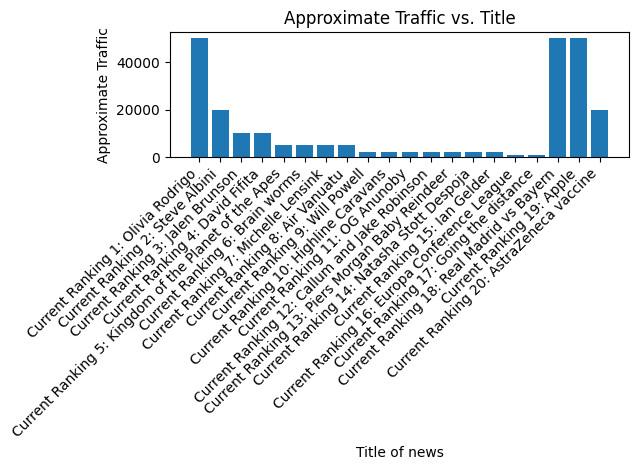

In [3]:

# print(rss_title)

# Print a plot of top trends

import matplotlib.pyplot as plt

titles = [f"Current Ranking {item['Rank']}: {item['Title']}" for item in data]
ranks = [item['Rank'] for item in data]
traffic = [item['Approx Traffic'] for item in data]

plt.bar(ranks, traffic, tick_label=titles)
plt.xlabel('Title of news')
plt.ylabel('Approximate Traffic')
plt.title('Approximate Traffic vs. Title')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [4]:

####### Code for visualisation using top trends ####

import tkinter as tk
from tkinter import ttk, messagebox
import requests

# Function to handle bar click
def bar_click(event):
    index = event.x // (canvas_width / len(data))
    url = data[int(index)]['URL']
    open_url(url)


# Create main window
root = tk.Tk()
root.title("Trending News")


# Add padding
padding = 100
root.geometry(f"{600 + 2 * padding}x{400 + 2 * padding}")

# Create frame
frame = tk.Frame(root)
frame.pack(fill=tk.BOTH, expand=True, padx=padding, pady=padding)

# Create canvas
canvas_width = 600
canvas_height = 400
canvas = tk.Canvas(frame, width=canvas_width, height=canvas_height)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# Create scrollbar
scrollbar = tk.Scrollbar(frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

# Configure canvas to use scrollbar
canvas.configure(yscrollcommand=scrollbar.set)
canvas.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

# Create frame inside canvas
inner_frame = tk.Frame(canvas)
canvas.create_window((0, 0), window=inner_frame, anchor="nw")

# Plotting the bars
bar_height = canvas_height / len(data)
for i, item in enumerate(data):
    rank = item['Rank']
    title = item['Title']
    approx_traffic = item['Approx Traffic']
    x0 = 0
    y0 = i * bar_height
    x1 = (approx_traffic / max([d['Approx Traffic'] for d in data])) * canvas_width
    y1 = (i + 1) * bar_height
    canvas.create_rectangle(x0, y0, x1, y1, fill='blue')
    canvas.create_text(x1 + 10, (y0 + y1) / 2, text=f'{rank}. {title}', anchor='w', fill='white', font=('Helvetica', 10))

# Binding bar click event
canvas.bind("<Button-1>", bar_click)

# Run the GUI
root.mainloop()()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_45385/4106987811.py", line 11, in bar_click
    open_url(url)
    ^^^^^^^^
NameError: name 'open_url' is not defined


TypeError: 'NoneType' object is not callable

In [5]:
####### Code for a search functionality against newsAPI

import tkinter as tk
from tkinter import ttk, messagebox
import requests

# API Key
api_key = "965e66c7da154b889eb786f7e2ba3436"

# Function to handle button clicks
def on_home_click():
    print("Home button clicked")

def on_quit_click():
    print("Quit button clicked")
    root.quit()

def on_search_click():
    # Get search options from entry fields and combobox
    keyword = keyword_entry.get()
    date = date_entry.get()
    author = author_entry.get()
    category = category_combobox.get()

    # Make the API request
    url = "https://newsapi.org/v2/everything"
    params = {
        "apiKey": api_key,
        "language": "en",
    }
    request = requests.get(url, params=params)

        # Add search parameters only if they are not empty
    if keyword:
        params["q"] = keyword
    if date:
        params["from"] = date
        params["to"] = date
    if author:
        params["author"] = author
    if category:
        params["category"] = category.lower()  # Convert category to lowercase as required by API

    request = requests.get(url, params=params)
    
    
    # Process the response
    data = request.json()

    # Display the results in the text widget
    results_text.delete(1.0, tk.END)  # Clear previous results
    results_text.insert(tk.END, f"Results for keyword '{keyword}' in category '{category}':\n\n")
    for article in data["articles"]:
        title = article['title']
        url = article['url']
        results_text.insert(tk.END, f"{title}\n")
        results_text.tag_add(title, tk.SEL_FIRST, tk.SEL_LAST)
        results_text.tag_bind(title, "<Button-1>", lambda event, url=url: open_url(url))
    results_text.config(state=tk.DISABLED)  # Disable editing of text widget

# Function to open URL
def open_url(url):
    import webbrowser
    webbrowser.open_new(url)

# Create main window
root = tk.Tk()
root.title("News Search")

# Create top frame with entry fields for search options
top_frame = tk.Frame(root)
top_frame.grid(row=0, column=0, sticky="ew", padx=20, pady=10)

keyword_label = tk.Label(top_frame, text="Keyword:")
keyword_label.grid(row=0, column=0)
keyword_entry = tk.Entry(top_frame, width=40)
keyword_entry.grid(row=0, column=1)

date_label = tk.Label(top_frame, text="Date:")
date_label.grid(row=1, column=0)
date_entry = tk.Entry(top_frame, width=40)
date_entry.grid(row=1, column=1)

author_label = tk.Label(top_frame, text="Author:")
author_label.grid(row=2, column=0)
author_entry = tk.Entry(top_frame, width=40)
author_entry.grid(row=2, column=1)

category_label = tk.Label(top_frame, text="Category:")
category_label.grid(row=3, column=0)
category_combobox = ttk.Combobox(top_frame, values=["Business", "Technology", "Sports", "General", "Health", "Science"], width=20)
category_combobox.grid(row=3, column=1)

search_button = tk.Button(top_frame, text="Search", command=on_search_click)
search_button.grid(row=4, columnspan=2, pady=10)

# Create middle frame with text widget to display results
middle_frame = tk.Frame(root)
middle_frame.grid(row=1, column=0, sticky="nsew")

results_text = tk.Text(middle_frame, width=80, height=20)
results_text.pack(fill=tk.BOTH, expand=True)

# Create bottom frame with buttons
bottom_frame = tk.Frame(root)
bottom_frame.grid(row=2, column=0, sticky="ew", padx=20, pady=10)
home_button = tk.Button(bottom_frame, text="Home", command=on_home_click)
home_button.pack(side="left", padx=10)
quit_button = tk.Button(bottom_frame, text="Quit", command=on_quit_click)
quit_button.pack(side="left", padx=10)

# Run the GUI
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_45385/1316694681.py", line 57, in on_search_click
    results_text.tag_add(title, tk.SEL_FIRST, tk.SEL_LAST)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 3912, in tag_add
    self.tk.call(
_tkinter.TclError: text doesn't contain any characters tagged with "sel"
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_45385/1316694681.py", line 53, in on_search_click
    for article in